<a href="https://colab.research.google.com/github/nathfcastro/PROJECT-TWO-/blob/main/Project_Two_Part_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Two Part One 
Student Name: Nathalie Castro 

Whether you chose 2 pre-approved datasets or 2 datasets from another source, or one of each:

Create a notebook where you have uploaded and shown the .head() of each of your data sets. For each of the proposed datasets, include the following information in text cells:

**First choice: dataset 1**
> 1. Source of data
>2. Brief description of data
>3. What is the target?
>4. What does one row represent? (A person?  A business?  An event? A product?)
>5. Is this a classification or regression problem?
>6. How many features does the data have?
>7. How many rows are in the dataset?
>8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

**Second choice: dataset 2**
>1. Source of data
>2. Brief description of data
>3. What is the target?
>4. What does one row represent? (A person?  A business?  An event? A product?)
>5. Is this a classification or regression problem?
>6. How many features does the data have?
>7. How many rows are in the dataset?
>8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

# Data Set One: Cirrhosis

In [27]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
set_config(display="text")

In [4]:
filename = '/content/cirrhosis.csv'
cirrhosis = pd.read_csv(filename)
cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [6]:
cirrhosis.shape

(418, 20)

## How many features does the data have?
* There are 19 features in this data set. 

## What is the target?
* The target is Drug (placebo or D-penicillamine)

## How many rows are in the dataset?

In [7]:
# Display the number of rows and columns for the dataframe
cirrhosis.shape
print(f'There are {cirrhosis.shape[0]} rows, and {cirrhosis.shape[1]} columns.')
print(f'The rows represent {cirrhosis.shape[0]} observations, and the columns represent {cirrhosis.shape[1]-1} features and 1 target variable.')

There are 418 rows, and 20 columns.
The rows represent 418 observations, and the columns represent 19 features and 1 target variable.


## Brief Decscription of Data 

Data Source: https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset

Total of 424 PBC patients that was referred by ther Mayo clinic during a ten-year interval had met an eligible criteria for a randomized placebo-control trial of the drug D-penicillamine. For the first 312 patients that participated in this clinical trial. However, 112 patients did not participate in the clinical trial, but consented to have the basic measurements recorded and siz of the cases were lost to follow-up shortly after diagnosis. 

Below is a description of the columns: 

> * ID: Unique Identifier 
* N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
* Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
* Drug: type of drug D-penicillamine or placebo
* Age: age in [days]
* Sex: M (male) or F (female)
* Ascites: presence of ascites N (No) or Y (Yes)
* Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
* Spiders: presence of spiders N (No) or Y (Yes)
* Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
* Bilirubin: serum bilirubin in [mg/dl]
* Cholesterol: serum cholesterol in [mg/dl]
* Albumin: albumin in [gm/dl]
* Copper: urine copper in [ug/day]
* Alk_Phos: alkaline phosphatase in [U/liter]
* SGOT: SGOT in [U/ml]
* Triglycerides: triglicerides in [mg/dl]
* Platelets: platelets per cubic [ml/1000]
* Prothrombin: prothrombin time in seconds [s]
* Stage: histologic stage of disease (1, 2, 3, or 4)






## Is this a classification or regression problem?
> * This is a classification problem 

## What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
> * Some challanges I forsee is probably exploring this data because there are a lot of columns in this data set. Additionally, I may have some challanges with cleaning because there may be rows that I have to replace because the data is not the same or there maybe a lot of missing data that I have to impute. 

## Cleaning Data

In [11]:
cirrhosis.duplicated().sum()

0

There are no duplicates. 

In [12]:
cirrhosis.nunique()

ID               418
N_Days           399
Status             3
Drug               2
Age              344
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin         98
Cholesterol      201
Albumin          154
Copper           158
Alk_Phos         295
SGOT             179
Tryglicerides    146
Platelets        243
Prothrombin       48
Stage              4
dtype: int64

Looking at the dataset the "ID" column is unnecessary because this is only being used as a unique identifier 

In [13]:
# Drops the ID column
cirrhosis.drop(columns="ID", inplace=True)

In [14]:
cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [28]:
cat_cols = make_column_selector(dtype_include='object')(cirrhosis)
for col in cat_cols:
  display(cirrhosis[col].value_counts())

C     232
D     161
CL     25
Name: Status, dtype: int64

D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64

F    374
M     44
Name: Sex, dtype: int64

N    288
Y     24
Name: Ascites, dtype: int64

Y    160
N    152
Name: Hepatomegaly, dtype: int64

N    222
Y     90
Name: Spiders, dtype: int64

N    354
S     44
Y     20
Name: Edema, dtype: int64

There are no outliers in the categorial columns 

In [24]:
# Get summary stats to hopefully discern some outliers
cirrhosis.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


There are no concerning outliers in this set 

In [25]:
# Check for missing values
cirrhosis.isna().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

We will handle these missing values when we preprocess our data to avoid any data leakage. 

## Exploratory Univariate Visuals

In [29]:
cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

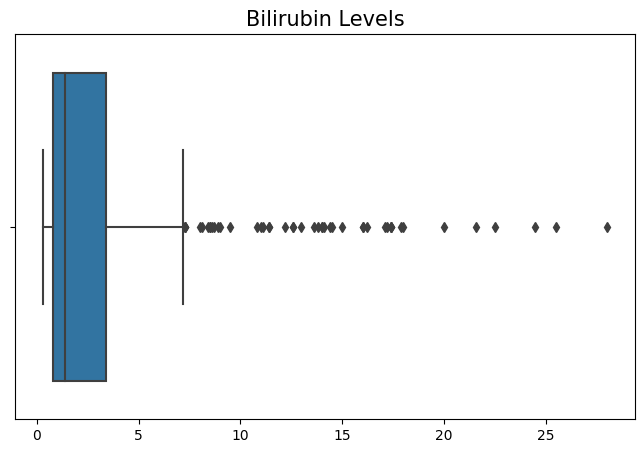

In [35]:
fig = plt.figure(figsize =(8, 5))
ax = sns.boxplot( x="Bilirubin", data=cirrhosis)
ax.set_title("Bilirubin Levels", fontsize = 15);
ax.set_xlabel('');

The outliers is anything over 5mg/dL

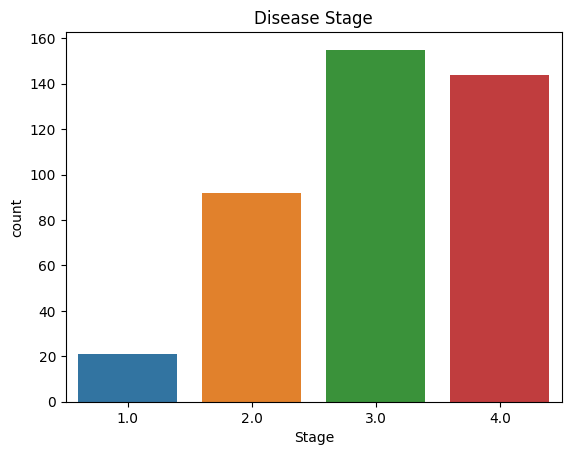

In [36]:
sns.countplot(data=cirrhosis, x="Stage").set_title("Disease Stage");

The majority of the patients are in Stage 3 while the minority of patients are in Stage 1. 

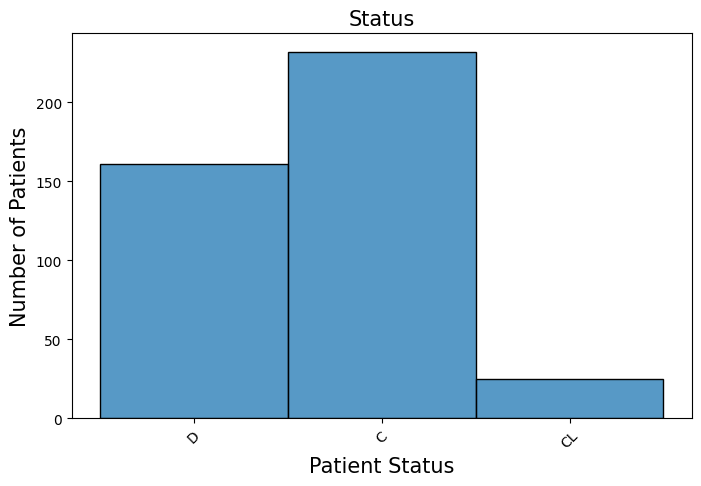

In [38]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "Status", data=cirrhosis)
plt.xticks(rotation=45)
ax.set_ylabel('Number of Patients',fontsize = 15)
ax.set_xlabel('Patient Status', fontsize = 15)
ax.set_title("Status", fontsize = 15);

Majority of patients are censored while the minority is censored due to liver tx and the average of patients are deceased. 

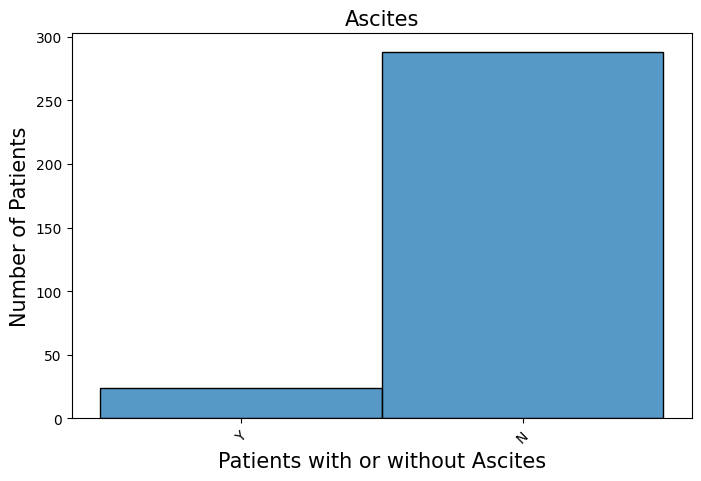

In [40]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "Ascites", data=cirrhosis)
plt.xticks(rotation=45)
ax.set_ylabel('Number of Patients',fontsize = 15)
ax.set_xlabel('Patients with or without Ascites', fontsize = 15)
ax.set_title("Ascites", fontsize = 15);

Majority of patients do not have Ascites

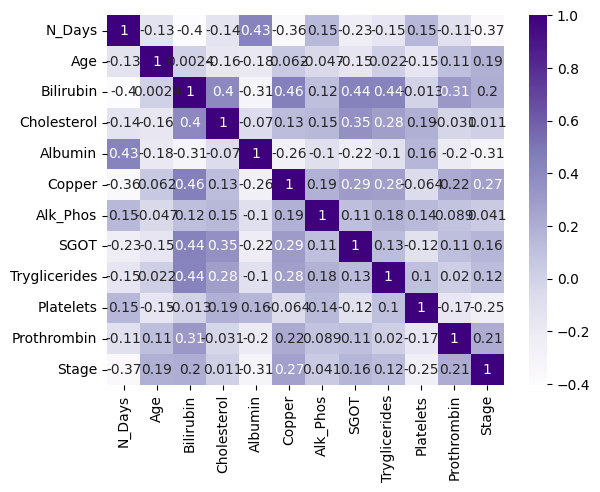

In [41]:
corr = cirrhosis.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True)
plt.show()

## Multi-Variate Visuals
Best Graphs Chosen Drug

<ipython-input-45-f71c476a7ed9>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


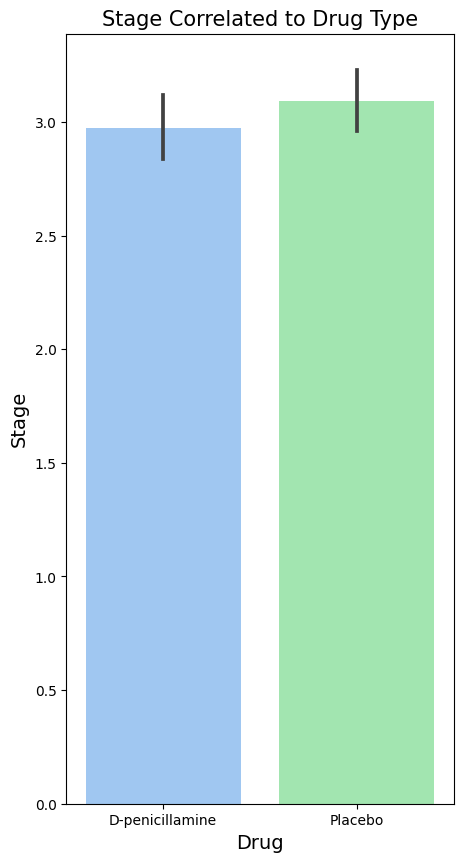

In [45]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(5,10))
sns.barplot(data=cirrhosis, x="Drug", y= "Stage")
plt.title("Stage Correlated to Drug Type", fontsize = 15)
plt.xlabel("Drug", fontsize = 14)
plt.ylabel("Stage", fontsize = 14)
plt.show();

Majority of patients who use the placebo drug is Stage 4 and the majority of patients who use the D-penicillamine is Stage 3 or less. 

<ipython-input-47-0957d011110d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


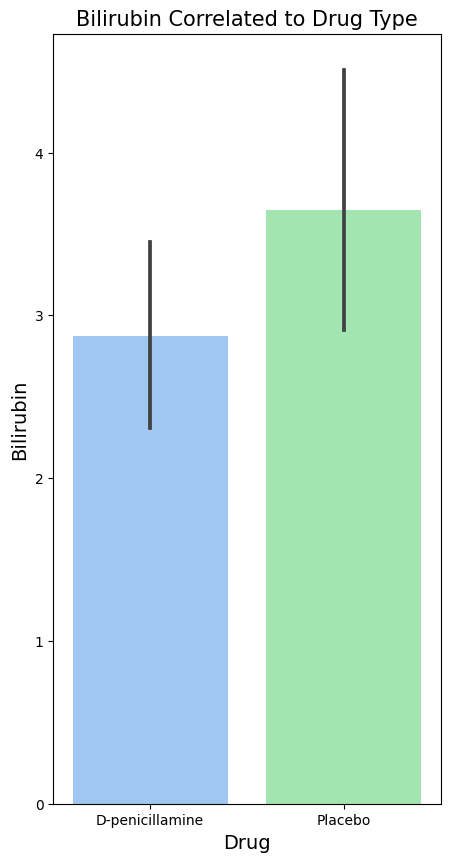

In [47]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(5,10))
sns.barplot(data=cirrhosis, x="Drug", y= "Bilirubin")
plt.title("Bilirubin Correlated to Drug Type", fontsize = 15)
plt.xlabel("Drug", fontsize = 14)
plt.ylabel("Bilirubin", fontsize = 14)
plt.show();

<ipython-input-48-658a36bb48d4>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


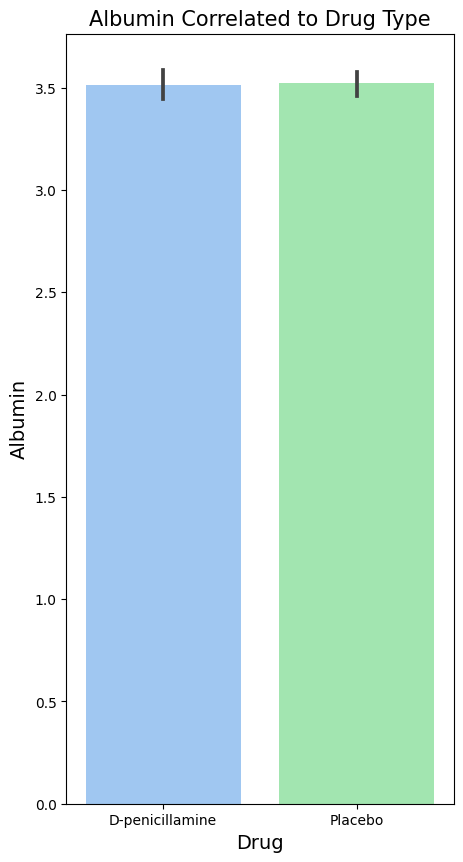

In [48]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(5,10))
sns.barplot(data=cirrhosis, x="Drug", y= "Albumin")
plt.title("Albumin Correlated to Drug Type", fontsize = 15)
plt.xlabel("Drug", fontsize = 14)
plt.ylabel("Albumin", fontsize = 14)
plt.show();

The albumin is the same for patients who take the D-penicillamine and the palcebo. 

### Best Graph Chosen is Stage

<ipython-input-50-d3e4b2b98a5d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


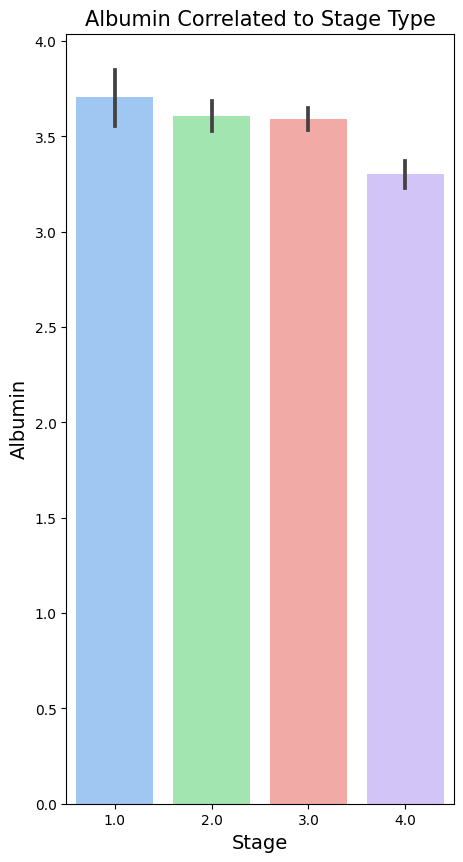

In [50]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(5,10))
sns.barplot(data=cirrhosis, x="Stage", y= "Albumin")
plt.title("Albumin Correlated to Stage Type", fontsize = 15)
plt.xlabel("Stage", fontsize = 14)
plt.ylabel("Albumin", fontsize = 14)
plt.show();

Patients in stage 1 have a higher albumin while patients with stage 4 have a lower albumin level. 

<ipython-input-51-84bc7281b93c>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


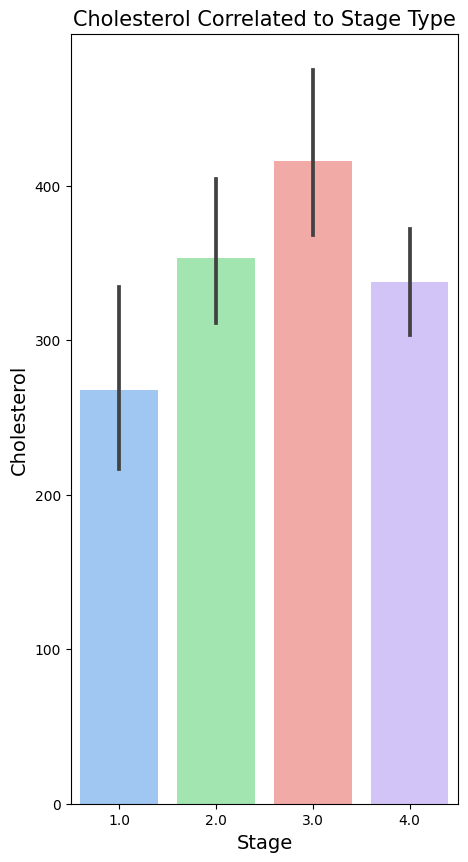

In [51]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(5,10))
sns.barplot(data=cirrhosis, x="Stage", y= "Cholesterol")
plt.title("Cholesterol Correlated to Stage Type", fontsize = 15)
plt.xlabel("Stage", fontsize = 14)
plt.ylabel("Cholesterol", fontsize = 14)
plt.show();

Patients in stage 3 have a higher cholesterol while patients in Stage 1 have a lower cholesterol. 